<a href="https://colab.research.google.com/github/Shibu778/Shibu/blob/master/Nonlinear_adaptive_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

# This can also be done by clicking on the file icon in the left side and then on the Mount Drive icon


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [146]:
cd drive


/content/drive


In [147]:
cd My Drive

/content/drive/My Drive


In [148]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
# Upload the denoising.xlsx file to the My drive folder of your drive (For the google account that you are using)


df = pd.read_excel('denoising.xlsx')

print("MLD:")
print(df.columns)
print(df)

MLD:
Index(['MLD'], dtype='object')
          MLD
0      36.075
1      36.050
2      36.050
3      36.200
4      36.200
...       ...
12181  36.050
12182  36.225
12183  36.225
12184  36.200
12185  35.900

[12186 rows x 1 columns]


In [149]:
cd ..

/content/drive


In [150]:
cd ..

/content


In [0]:
# Function for nonlinear adaptive filtering
import numpy as np
def nada(x,n,K):
  # Function for nonlinear adaptive filter
  # Reference: Tung, Wen-Wen & Gao, Jianbo & Hu, Jing & Yang, Lei. (2011). Detecting chaos in heavy-noise environments.
  # Code written by: Shibu Meher
	# x is the time series
	# n is the length of the segment taken
	# K is the order of the polynomial to be fitted
	# y is the filtered data
  Y = x

  ln_y = len(Y) # Length of time series Y
  t = [i for i in range(1,ln_y+1)]  # Creating an array to store time index

  m = int(ln_y/n)  # number of segment
  r = ln_y%n # Length of timeseries after remain which is less than n

  S = []
  op = []
  for i in range(1,m):
    S1 = []
    S1.append(Y[(i-1)*n:(i+1)*n+1])
    S1.append(t[(i-1)*n:(i+1)*n+1])
    S.append(S1)
    if i!=m-1:
      op1 = []
      op1.append(Y[i*n:(i+1)*n+1])
      op1.append(t[i*n:(i+1)*n+1])
      op.append(op1)

    if i == m-1:
      S1 = []
      S1.append(Y[i*n:(i+1)*n+r])
      S1.append(t[i*n:(i+1)*n+r])
      S.append(S1)
      op1 = []
      op1.append(Y[i*n:(i+1)*n+1])
      op1.append(t[i*n:(i+1)*n+1])
      op.append(op1)

  poly_S = []
  for i in range(0,len(S)):
    poly_S.append(np.polyfit(np.array(S[i][1]),np.array(S[i][0]),K))

  polyval_S = []
  for i in range(0,len(S)):
    polyval_S.append(np.polyval(poly_S[i],S[i][1]))

  l = [i for i in range(1,n+2)]
  w = []
  for i in range(0,n+1):
    w.append((l[i]-1)/n)  # Weight w1 varing from 1 to 0
  w = np.array(w)

  polyval_op = []
  for i in range(0,len(op)):
    polyval_op.append((1-w)*np.polyval(poly_S[i],op[i][1])+w*np.polyval(poly_S[i+1],op[i][1]))

  Y1 = np.array([])
  Y1 = np.concatenate((Y1,polyval_S[0][0:n+1]))
  for i in range(0,len(op)):
    Y1 = np.concatenate((Y1,polyval_op[i][0:-1]))
  Y1 = np.concatenate((Y1,polyval_S[len(S)-1][n+1:n+r+1]))
  return Y1

12186

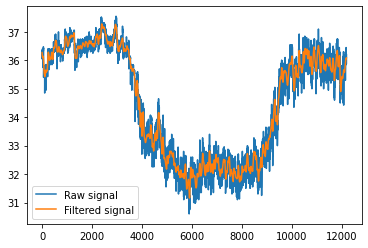

In [228]:
x = np.array(df['MLD'])
Y1= nada(x,30,2)
plt.plot(x,label = 'Raw signal')
plt.plot(Y1,label = 'Filtered signal')
plt.legend()

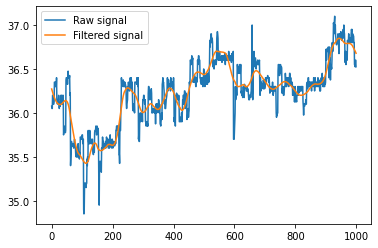

In [229]:
x = np.array(df['MLD'])
Y1= nada(x,30,2)
plt.plot(x[0:1000],label = 'Raw signal')
plt.plot(Y1[0:1000],label = 'Filtered signal')
plt.legend()